In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from matplotlib.ticker import MaxNLocator
from scipy.special import binom
from scipy.optimize import curve_fit
from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
fparams3 =  {'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'axes.labelsize': 26,
            'axes.titlesize': 22,
            'font.size': 22,
            'legend.fontsize': 20,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}

In [3]:
%run "C:\Users\Nick\Projects\thermalization_sim\v5_resubmission\SYK2_thermalizer.py" 

In [4]:
num = [4, 6, 8] # -- number of qubits
num_ex = [0] # -- number of the initial state. It ranges from 0 to 2^N - 1.
nr = 100 # -- number of realizations

time = np.load('data/time.npy', allow_pickle = True)
time_long = np.load('data/long/time.npy', allow_pickle = True)

energ = {}
sp_levels = {}
es = {}
p = {}
pav = {}
err_av = {}
E = {}
E2 ={}
S = {}
Eav = {}
Eav_long ={}
Sav = {}
#rhoav = {}
omegas_print = {} 
omega_mean = {}
E_in ={}

for n in range(len(num)):
    sp_levels[n] = np.load('data/sp_levels_N={}.npy'.format(num[n]), allow_pickle = True)
    energ[n] = np.load('data/energ_N={}.npy'.format(num[n]), allow_pickle = True)
    omegas_print[n] = list(np.sort(np.round(sp_levels[n], 2)))
    omega_mean[n] = np.round(np.sum(sp_levels[n]) / num[n], 2)
    for m in range(len(num_ex)):
        E[n, m] = np.load('data/E_N={}_M={}_nr={}.npy'.format(num[n], num_ex[m], nr), allow_pickle = True)
        Eav[n, m] = np.load('data/Eav_N={}_M={}_nr={}.npy'.format(num[n], num_ex[m], nr), allow_pickle = True)

In [5]:
np.mean(np.transpose(E[1, 0])[0:10],0).shape

(401,)

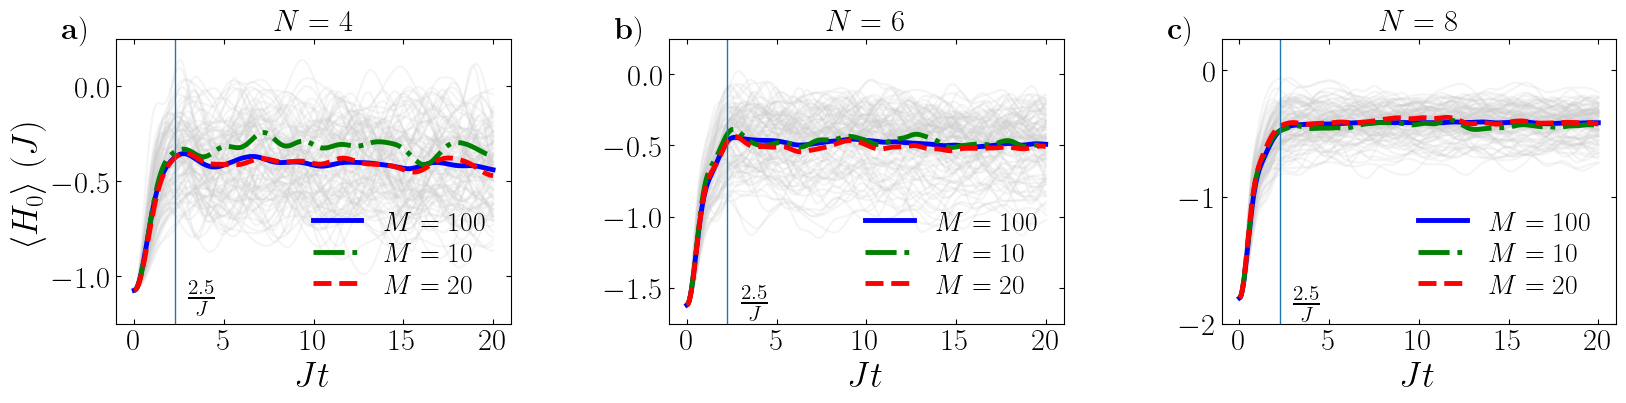

In [6]:
plt.rcParams.update(fparams3)

num_ind = 0

fig = plt.figure(figsize=(15, 9.5))


spec_B = gridspec.GridSpec(ncols=3, nrows=1, bottom=0., top=0.3, left = 0., right = 1)

ax1 = fig.add_subplot(spec_B[0, 0])
ax2 = fig.add_subplot(spec_B[0, 1])
ax3 = fig.add_subplot(spec_B[0, 2])

num_ind = 0
n_init = [0]
ax1.set_title(r'$N={}$'.format(num[num_ind]))
for j in range(nr):
    ax1.plot(time, np.transpose(E[num_ind, n_init[0]])[j], '-', color='0.8', alpha = 0.2)
ax1.plot(time, Eav[num_ind, n_init[0]],  '-', color = 'blue', linewidth = 3.5, 
         label = r'$M={}$'.format(nr))
Eav10 = np.mean(np.transpose(E[num_ind, n_init[0]])[0:10], 0)
ax1.plot(time, Eav10,  '-.', color = 'green', linewidth = 3.5, 
         label = r'$M={}$'.format(10))
Eav20 = np.mean(np.transpose(E[num_ind, n_init[0]])[0:20], 0)
ax1.plot(time, Eav20,  '--', color = 'red', linewidth = 3.5, 
         label = r'$M={}$'.format(20))
ax1.legend(loc = 4, ncol = 1, labelspacing = 0.25, handlelength = 1.75)
ax1.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax1.tick_params(which='minor', direction="in")
ax1.set_ylim([-1.25, 0.25])
#ax1.set_ylim([-0.75, -0.25])
ax1.set_xticks(np.arange(0, 21, 5))
ax1.text(-4, 0.25, r'${\bf a)}$')
ax1.vlines(2.25, -1.25, 0.25, linewidth = 1.)
ax1.text(3, -1.15, r'$\frac{2.5}{J}$')
ax1.set_ylabel(r'$\langle H_0 \rangle\,\, (J)$')
ax1.set_xlabel(r'$J t$')

num_ind = 1
n_init = [0]
ax2.set_title(r'$N={}$'.format(num[num_ind]))
for j in range(nr):
    ax2.plot(time, np.transpose(E[num_ind, n_init[0]])[j], '-', color='0.8', alpha = 0.2)
ax2.plot(time, Eav[num_ind, n_init[0]],  '-', color = 'blue', linewidth = 3.5, 
         label = r'$M={}$'.format(nr))
Eav10 = np.mean(np.transpose(E[num_ind, n_init[0]])[0:10], 0)
ax2.plot(time, Eav10,  '-.', color = 'green', linewidth = 3.5, 
         label = r'$M={}$'.format(10))
Eav20 = np.mean(np.transpose(E[num_ind, n_init[0]])[0:20], 0)
ax2.plot(time, Eav20,  '--', color = 'red', linewidth = 3.5, 
         label = r'$M={}$'.format(20))
ax2.legend(loc = 4, ncol = 1, labelspacing = 0.25, handlelength = 1.75)
ax2.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax2.tick_params(which='minor', direction="in")
ax2.set_ylim([-1.75, 0.25])
ax2.set_xticks(np.arange(0, 21, 5))
ax2.text(-4, 0.25, r'${\bf b)}$')
ax2.vlines(2.25, -1.75, 0.25, linewidth = 1.)
ax2.text(3, -1.65, r'$\frac{2.5}{J}$')
ax2.set_xlabel(r'$J t$')

num_ind = 2
n_init = [0]
ax3.set_title(r'$N={}$'.format(num[num_ind]))
for j in range(nr):
    ax3.plot(time, np.transpose(E[num_ind, n_init[0]])[j], '-', color='0.8', alpha = 0.2)
ax3.plot(time, Eav[num_ind, n_init[0]],  '-', color = 'blue', linewidth = 3.5, 
         label = r'$M={}$'.format(nr))
Eav10 = np.mean(np.transpose(E[num_ind, n_init[0]])[0:10], 0)
ax3.plot(time, Eav10,  '-.', color = 'green', linewidth = 3.5, 
         label = r'$M={}$'.format(10))
Eav20 = np.mean(np.transpose(E[num_ind, n_init[0]])[0:20], 0)
ax3.plot(time, Eav20,  '--', color = 'red', linewidth = 3.5, 
         label = r'$M={}$'.format(20))
ax3.legend(loc = 4, ncol = 1, labelspacing = 0.25, handlelength = 1.75)
ax3.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax3.tick_params(which='minor', direction="in")
ax3.set_ylim([-2., 0.25])
#ax3.set_ylim([-0.75, -0.25])
ax3.set_xticks(np.arange(0, 21, 5))
ax3.text(-4, 0.25, r'${\bf c)}$')
ax3.vlines(2.25, -2, 0.25, linewidth = 1.)
ax3.text(3, -1.9, r'$\frac{2.5}{J}$')
ax3.set_xlabel(r'$J t$')

spec_B.update(wspace=0.4)

plt.subplots_adjust()

#plt.savefig('figs/fig_H0_NM.svg', bbox_inches="tight", pad_inches = 0)